# Pose Classification

In this analysis, we utilize linear algebra to discern and characterize poses, an approach that is especially relevant in pole fitness where detailing upper and lower body engagement is crucial. This includes grips, holds, and other forms of interaction with the pole. Given the niche nature of pole fitness, there is a scarcity of comprehensive training data available, which underscores the need for advanced analytical techniques to accurately interpret and classify complex movements.


### Required Modules

In [14]:
import os
import pandas as pd
import cv2
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Detecting Pose using Least Average Euclidean Distance

* Since our data set only includes one side of a pose, we must also compute its inverse.
* Despite limited training data, we can still describe the similar regions, which provides insights on upper, mid and lower body engagement.

In [15]:
def compute_distance(x1, y1, x2, y2):
  dx = x2 - x1
  dy = y2 - y1
  distance = np.sqrt(dx**2 + dy**2)
  return round(distance,4)

def compute_distance_matrix(df1xy, df2xy):
    distance_matrix = []
    for i in range(0,len(df1xy)):
        d = compute_distance(df1xy[i][0],df1xy[i][1],df2xy[i][0], df2xy[i][1])
        distance_matrix.append(d)
    return distance_matrix

def compute_pose_euclidean_distance(training_data_dir, user_data_path, avg_thresh):
    
    try:
        if not os.path.exists(training_data_dir) or not os.path.exists(user_data_path):
            return False

        training_data_files = []

        for filename in os.listdir(training_data_dir):
            if filename.endswith(".csv"):
                training_data_files.append(os.path.join(training_data_dir, filename))

        training_data_files.sort()

        solutions = {}
        
        ud = pd.read_csv(user_data_path)
        xu = ud['x'].tolist()
        yu = ud['y'].tolist()
        ud_tuple = [(xu[i], yu[i]) for i in range(len(xu))]
        
        for i, training_data_file in enumerate(training_data_files):
            td = pd.read_csv(training_data_file)
            x = td['x'].tolist()
            y = td['y'].tolist()
            td_tuple = [(x[i], y[i]) for i in range(len(x))]
            result = compute_distance_matrix(td_tuple,ud_tuple)
            distance_avg = round(sum(result) / 33,4)
        
            if distance_avg < avg_thresh:
                solutions[training_data_file] = {"distances": result, "average": distance_avg }
                
            if len(solutions) == 0:
                solutions is None
                
        return solutions

    except Exception as e:
        print(f"An error occurred: {str(e)}")
    return False

In [ ]:
def plot_compare_solutions(test_image, solutions):
    if len(solutions) == 0:
        return False
        
    num_solutions = len(solutions) + 1
    fig, axs = plt.subplots(1, num_solutions, figsize=(20, 5))
    axs[0].imshow(cv2.imread(test_image))
    axs[0].set_title("Test Image")
    axs[0].axis(False)
    i = 1
    for k, v in solutions.items():
        img_path = k[:-4] + ".png"
        img = cv2.imread(img_path)
        axs[i].imshow(img)
        axs[i].set_title(f"Solution {i} ({v['average']:.2f})")
        axs[i].axis(False)
        i += 1
    fig.tight_layout()
    plt.show()

### Results

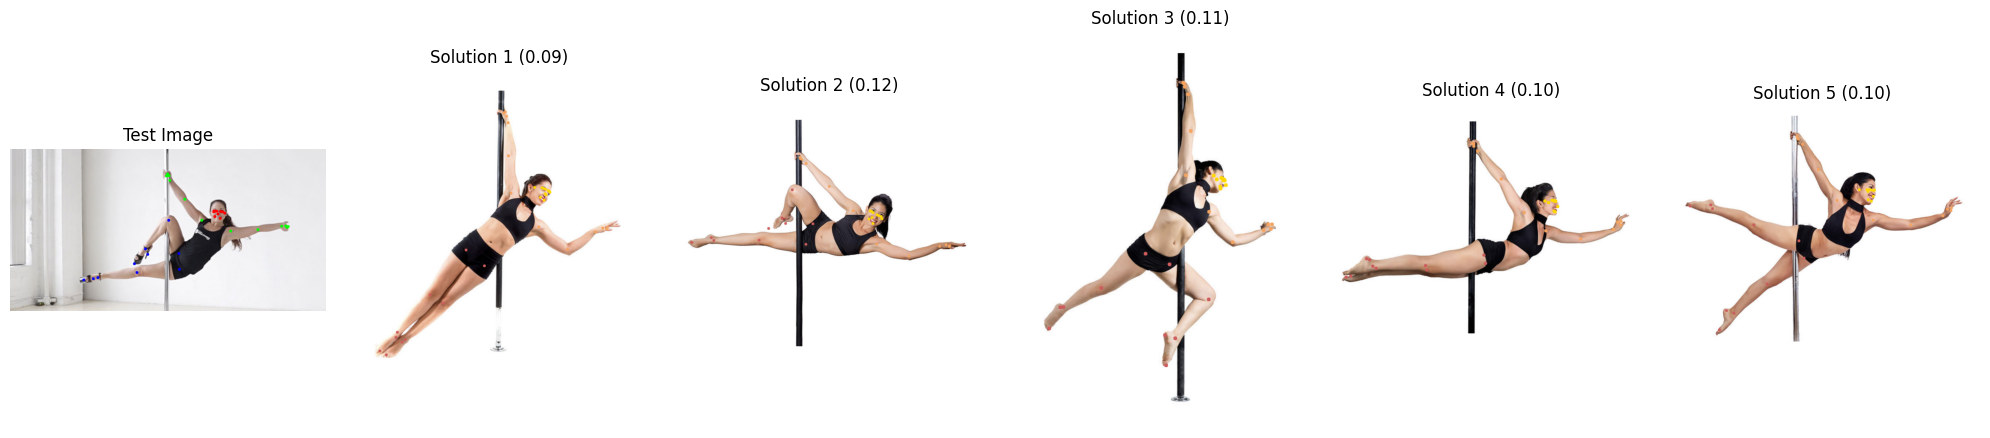

{'data/processed/static-pole-fitness/00162.csv': {'distances': [0.0169, 0.0153, 0.0146, 0.0138, 0.0161, 0.0178, 0.0187, 0.0356, 0.0386, 0.0318, 0.0278, 0.0756, 0.0904, 0.0917, 0.0507, 0.0611, 0.0415, 0.0375, 0.0412, 0.0379, 0.0351, 0.0469, 0.0331, 0.1546, 0.1614, 0.0853, 0.3421, 0.0895, 0.3224, 0.0879, 0.3209, 0.122, 0.3206], 'average': 0.0878}, 'data/processed/static-pole-fitness/00173.csv': {'distances': [0.0527, 0.0551, 0.0567, 0.0594, 0.0491, 0.0465, 0.0451, 0.0604, 0.0395, 0.054, 0.0455, 0.0678, 0.0376, 0.1043, 0.0585, 0.0836, 0.0928, 0.0752, 0.1053, 0.0778, 0.1126, 0.0796, 0.1099, 0.2214, 0.1932, 0.2584, 0.1555, 0.2944, 0.1832, 0.3058, 0.1933, 0.3124, 0.2322], 'average': 0.1188}, 'data/processed/static-pole-fitness/00205.csv': {'distances': [0.0501, 0.0384, 0.0331, 0.0282, 0.0469, 0.0472, 0.0479, 0.0259, 0.0347, 0.0411, 0.0475, 0.0724, 0.0854, 0.0651, 0.0751, 0.0419, 0.0896, 0.0307, 0.0873, 0.0299, 0.0782, 0.0344, 0.0779, 0.1573, 0.1198, 0.2643, 0.279, 0.2686, 0.2494, 0.2515, 0.2

In [24]:
training_data_dir = 'data/processed/static-pole-fitness'
user_data_path = 'data/processed/testing/00002.csv'
solutions = compute_pose_euclidean_distance(training_data_dir, user_data_path, 0.12)

test_image = 'data/processed/testing/00002.png'

if solutions:
    plot_compare_solutions(test_image, solutions)
else:
    print("no solutions found")

print(solutions)

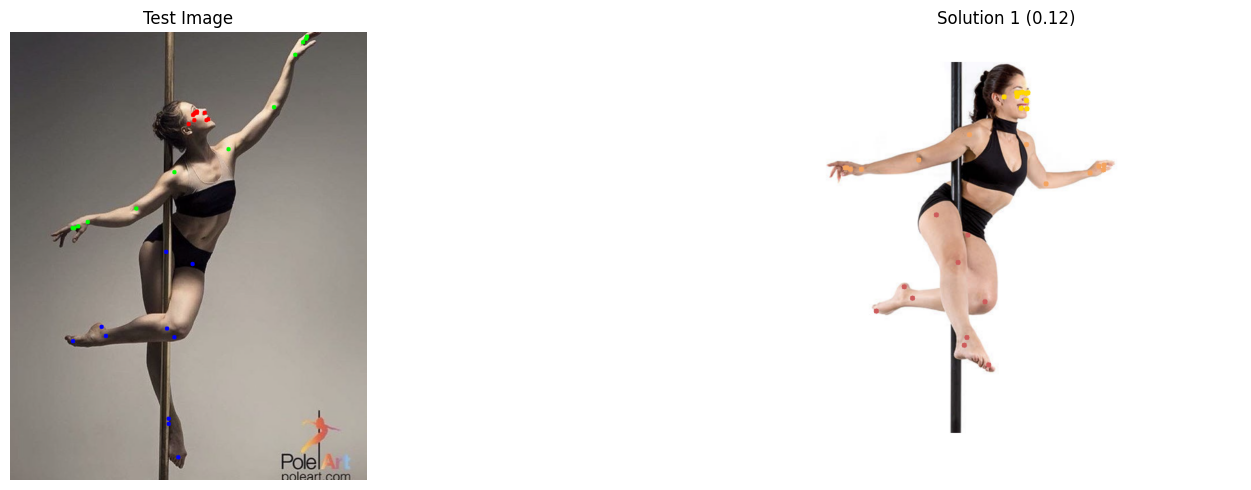

In [19]:
training_data_dir = 'data/processed/static-pole-fitness'
user_data_path = 'data/processed/testing/00001.csv'
solutions = compute_pose_euclidean_distance(training_data_dir, user_data_path, 0.13)

test_image = 'data/processed/testing/00001.png'
if solutions:
    plot_compare_solutions(test_image, solutions)
else:
    print("no solutions found")

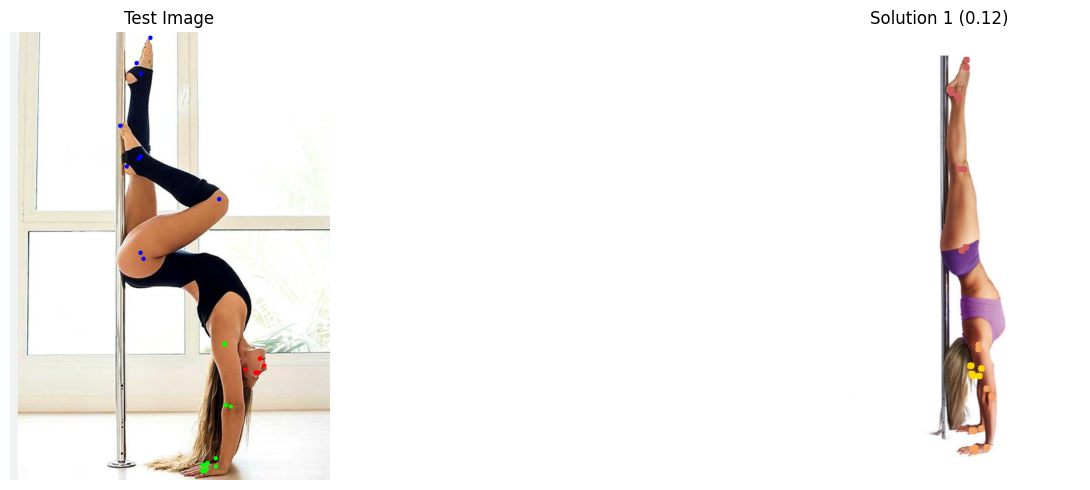

In [23]:
training_data_dir = 'data/processed/source-ik'
user_data_path = 'data/processed/testing/00003.csv'
solutions = compute_pose_euclidean_distance(training_data_dir, user_data_path, 0.14)

test_image = 'data/processed/testing/00003.png'
if solutions:
    plot_compare_solutions(test_image, solutions)
else:
    print("no solutions found")

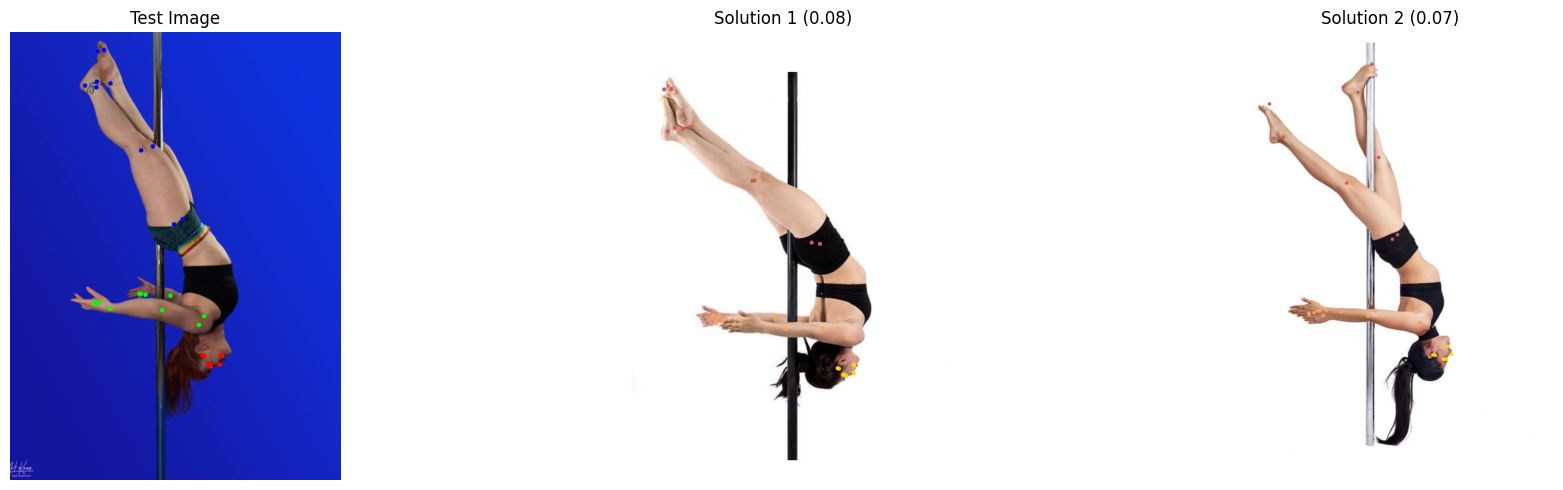

In [28]:
training_data_dir = 'data/processed/static-pole-fitness'
user_data_path = 'data/processed/testing/00004.csv'
solutions = compute_pose_euclidean_distance(training_data_dir, user_data_path, 0.11)

test_image = 'data/processed/testing/00004.png'
if solutions:
    plot_compare_solutions(test_image, solutions)
else:
    print("no solutions found")

In [ ]:
training_data_dir = 'data/processed/static-pole-fitness'
user_data_path = 'data/processed/testing/00005.csv'
solutions = compute_pose_euclidean_distance(training_data_dir, user_data_path, 0.14)

test_image = 'data/processed/testing/00005.png'
if solutions:
    plot_compare_solutions(test_image, solutions)
else:
    print("no solutions found")